<a href="https://colab.research.google.com/github/peddlem25/CreditCardFraudDetection/blob/master/Copy_of_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FRAUD DETECTION

Our Tasks:
  
  - Explore the datasets/ Visualize
  - Decide which features are important
  - Preform Machine Learning
  - Test the model on the testing set
  ***Credit card Data is comign from a Kaggle Dataset and uploaded to google drive named 'creditcard.csv'
  
  If Class-in-balance in datasets use the clustering method.
  ***Reminder, uploaded files will get deleted when this runtime is recycled, this included the creditcard.csv data file.


In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [0]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,53506,-0.202089,1.322589,0.402890,0.789767,0.267389,-0.362254,0.400755,0.241960,-0.830744,-0.395570,-1.173997,0.482737,1.520020,0.319582,0.899270,0.033596,-0.417036,0.232038,0.651517,-0.047627,0.128844,0.372893,-0.193985,-0.421908,0.017524,-0.279336,-0.033631,-0.024661,1.50,0.0
1,41060,-0.077743,-2.085376,0.185204,1.146710,-1.430538,-0.202209,0.504283,-0.135845,0.145280,-0.314090,1.394725,1.369249,0.502000,0.151331,-0.261580,0.297925,-0.385543,0.182638,-0.046323,1.247714,0.411588,-0.153562,-0.582156,0.629181,0.102674,0.377782,-0.139238,0.122034,652.00,0.0
2,39027,1.239285,-0.120862,0.323093,0.255099,-0.519177,-0.416436,-0.245757,0.093713,0.445376,-0.014341,0.629420,0.080349,-1.726744,0.563578,-0.192497,0.270624,-0.351763,0.121488,0.659204,-0.191212,-0.237768,-0.684155,0.031128,-0.003906,0.283688,0.454109,-0.058460,-0.006664,4.00,0.0
3,44270,0.605294,-1.371018,0.677834,0.236808,-1.084637,0.694507,-0.477658,0.296944,0.955168,-0.453150,0.809690,1.169809,-0.178572,-0.255494,-0.674848,-0.076157,0.070195,-0.408950,0.431822,0.474835,-0.007621,-0.407467,-0.188918,-0.211229,-0.031246,0.945291,-0.075634,0.046114,289.65,0.0
4,32897,-0.383204,0.858247,1.692233,-0.103150,0.260327,-0.429136,0.776543,-0.122872,-0.193001,-0.129043,-0.150027,-0.248142,-0.384147,0.036919,1.171779,-0.161007,-0.196230,-0.783254,-0.337916,0.118829,-0.254175,-0.485996,-0.023449,0.044913,-0.305058,0.073718,0.115050,-0.105667,1.98,0.0


The following show's how many Fraud and Non Fraud cases their are

In [0]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

177
71218


Visualize the *Fraud* VS the *Non Fraud* cases in dollar based transaction sizes.


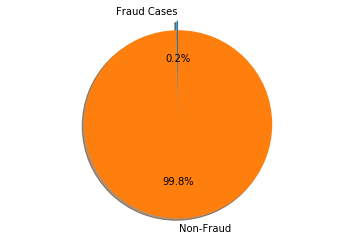

In [0]:
labels = 'Fraud Cases', 'Non-Fraud'
sizes = [177, 71218]
explode = (0.1, 0.0)  # only "explode" the 2nd slice (i.e. 'Fraud Cases')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

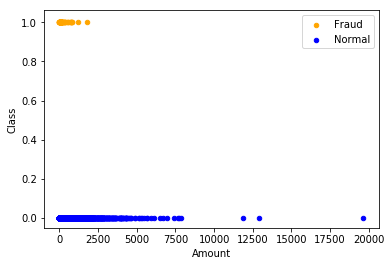

In [0]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

As we can see most if not all Fraud cases are in the amounts less than $5000.

#Machine Learning Time

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

**Train** 35%/ Test 65%

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35)

*1e5* = 100,000. C is a penalty term, used to disincentivize and regulate against over fig.

In [0]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, Y_train)
print('Score;', logistic.score(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Score; 0.9989968199191437

**Score** is 0.9989%

In [0]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]

**Most** is not fraud